In [1]:
import gravipy
import glob
from astropy.io import fits
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

# Initial guesses

In [3]:
orb = gravipy.GCorbits()
# orb = gravipy.GCorbits(verbose=False)

Stars with orbits:
['S1', 'S2', 'S4', 'S8', 'S9', 'S12', 'S13', 'S14', 'S17', 'S18', 'S19', 'S21', 'S23', 'S24', 'S29', 'S31', 'S33', 'S38', 'S42', 'S55', 'S60', 'S66', 'S67', 'S71', 'S83', 'S85', 'S87', 'S89', 'S91', 'S96', 'S97', 'S145', 'S175', 'R34', 'R44']

Stars with proper motions:
['S7', 'S10', 'S11', 'S20', 'S22', 'S25', 'S26', 'S27', 'S30', 'S32', 'S34', 'S35', 'S36', 'S37', 'S41', 'S43', 'S45', 'S46', 'S47', 'S50', 'S51', 'S52', 'S53', 'S56', 'S57', 'S59', 'S62', 'S63', 'S65', 'S68', 'S95', 'S300', 'S5', 'S6', 'S28', 'S39', 'S44', 'S48', 'S58', 'S64', 'S82']


In [4]:
orb.star_orbits['S2']

{'name': 'S2',
 'a': 124.95443497800004,
 'e': 0.884451414977,
 'P': 16.05472588091165,
 'T': 2018.37914035,
 'i': 2.350950151140611,
 'CapitalOmega': 3.9826052243324184,
 'Omega': 1.1569650367155615,
 'Kmag': 14.136727272727276,
 'Hmag': 15.63086206896552,
 'type': 'e',
 'mag': 14.136727272727276}

In [5]:
orb.star_pms['S62']

{'name': 'S62',
 'x': 33.847510592097876,
 'y': 41.14774114657065,
 'vx': -3.142370168752553,
 'vy': -3.808237727018113,
 'ax': 0.0,
 'ay': 0.0,
 'T': 2014.385205,
 'vr': 0,
 'Kmag': 18.85100555555556,
 'Hmag': 19.326874999999998,
 'type': '',
 'mag': 17.751005555555558,
 'circ': True}

In [6]:
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)
t

(2022.701003878622, datetime.datetime(2022, 9, 14, 1, 0))

In [7]:
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)[0]
t

2022.701003878622

In [8]:
orb.pos_orbit('S2', t)

array([0.01121982, 0.16407396])

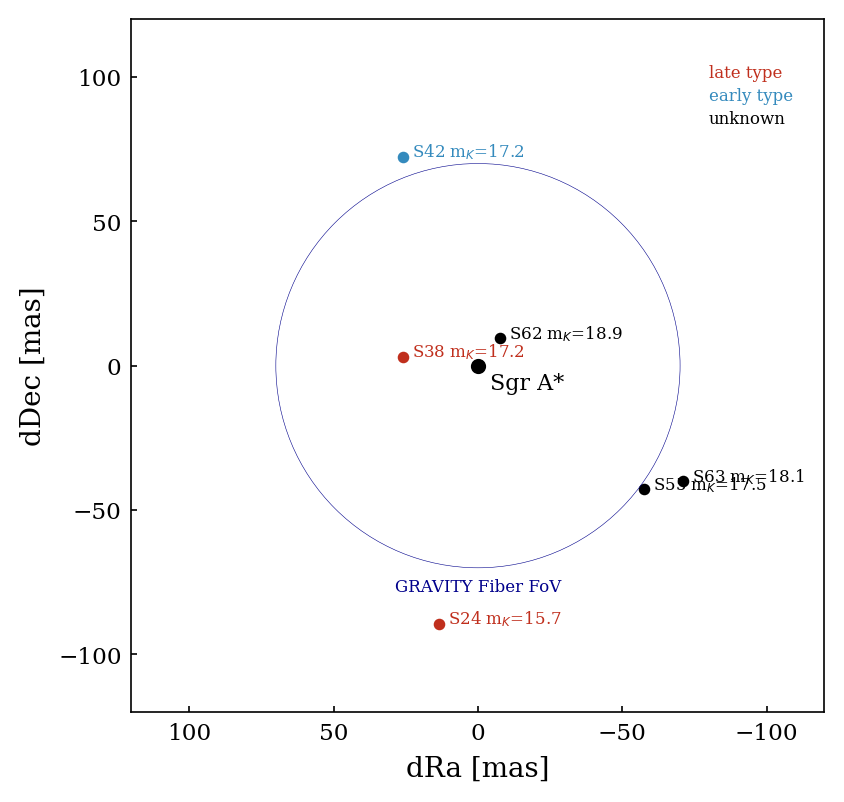

In [9]:
orb.plotOrbits(tstr, long=True)

In [10]:
import gravipy
orb = gravipy.GCorbits(verbose=False)
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)[0]

s38 = orb.pos_orbit('S38', t)*1e3
s62 = orb.pos_pm('S62', t)*1e3
s62s38 = 10**(-0.4*(orb.star_pms['S62']['Kmag'] - orb.star_orbits['S38']['Kmag']))

# Full night corrections

In [11]:
night = '2022-09-14'
n = gravipy.GravPhaseNight(night)

using default calibrator
Night:      2022-09-14 
Calibrator: GRAVI.2022-09-14T23:50:37.719_dualscivis.fits
Data from:  /data/user/forFrank2/2022-09-14/reduced_PL20220728
            11 SGRA files 
            4 S2 files
NDIT:       1





No correction for metrology systematics used
Applied poscor: (-0.253,0.815) mas 
Chi2 of poscor: 1571.70 



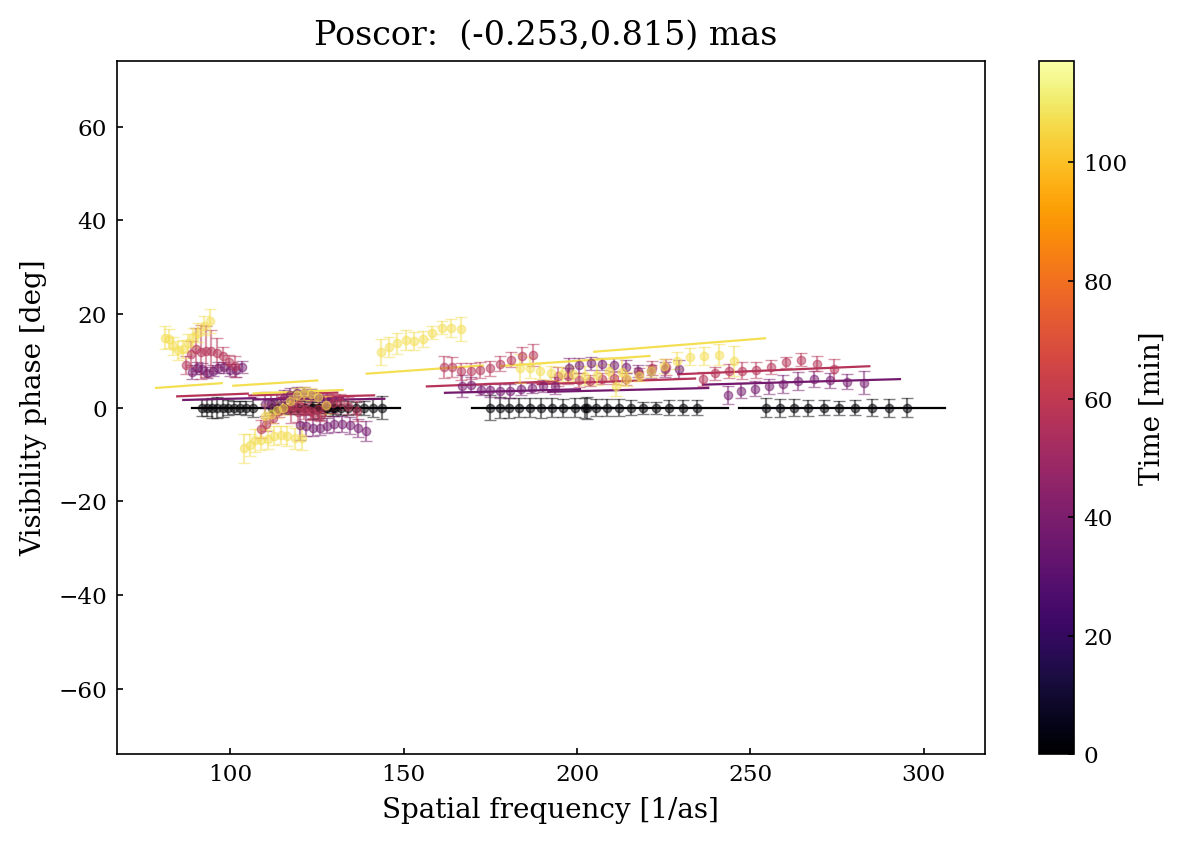

/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/phasecor.py:1828: RuntimeWarning: invalid value encountered in remainder
  sg_visphi_p1 = ((sg_visphi_p1+180)%360)-180
/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/phasecor.py:1829: RuntimeWarning: invalid value encountered in remainder
  sg_visphi_p2 = ((sg_visphi_p2+180)%360)-180


In [12]:
n.process_night(None, poscor=True, plot=True)

# Fitting
## Look at data

In [13]:
data = sorted(glob.glob('/data/user/forFrank2/2022-09-14/reduced_PL20220728/poscor_nometcor/calibrated_S2/calibrated/*dualsciviscalibrated.fits'))

In [14]:
_ = [print(fits.open(i)[0].header['ESO INS SOBJ OFFX'], fits.open(i)[0].header['ESO INS SOBJ OFFY'])
     for i in data]

10.509 164.113
0.0 0.0
0.0 0.0
0.0 0.0
10.509 164.113
9.71 76.951
9.71 76.951
10.509 164.113
10.0 -97.693
10.0 -97.693
10.0 -97.693
0.0 0.0
0.0 0.0
10.509 164.113
0.0 0.0


In [15]:
sgfiles = []
s2files = []
northfiles = []
southfiles = []
for d in data:
    h = fits.open(d)[0].header
    if h['ESO INS SOBJ OFFX'] == 0:
        sg_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        sgfiles.append(d)
    elif h['ESO INS SOBJ OFFX'] == 10.509:
        s2files.append(d)
        s2_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
    elif h['ESO INS SOBJ OFFX'] == 9.71:
        n_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        print('North')
        northfiles.append(d)
    elif h['ESO INS SOBJ OFFX'] == 10.:
        s_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        print('South')
        southfiles.append(d)
    else:
        print([h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']])


North
North
South
South
South


Category: DUAL_SCI_VIS_CALIBRATED
Telescope: UT
Polarization: SPLIT
Resolution: LOW
DIT: 10.000000
NDIT: 32


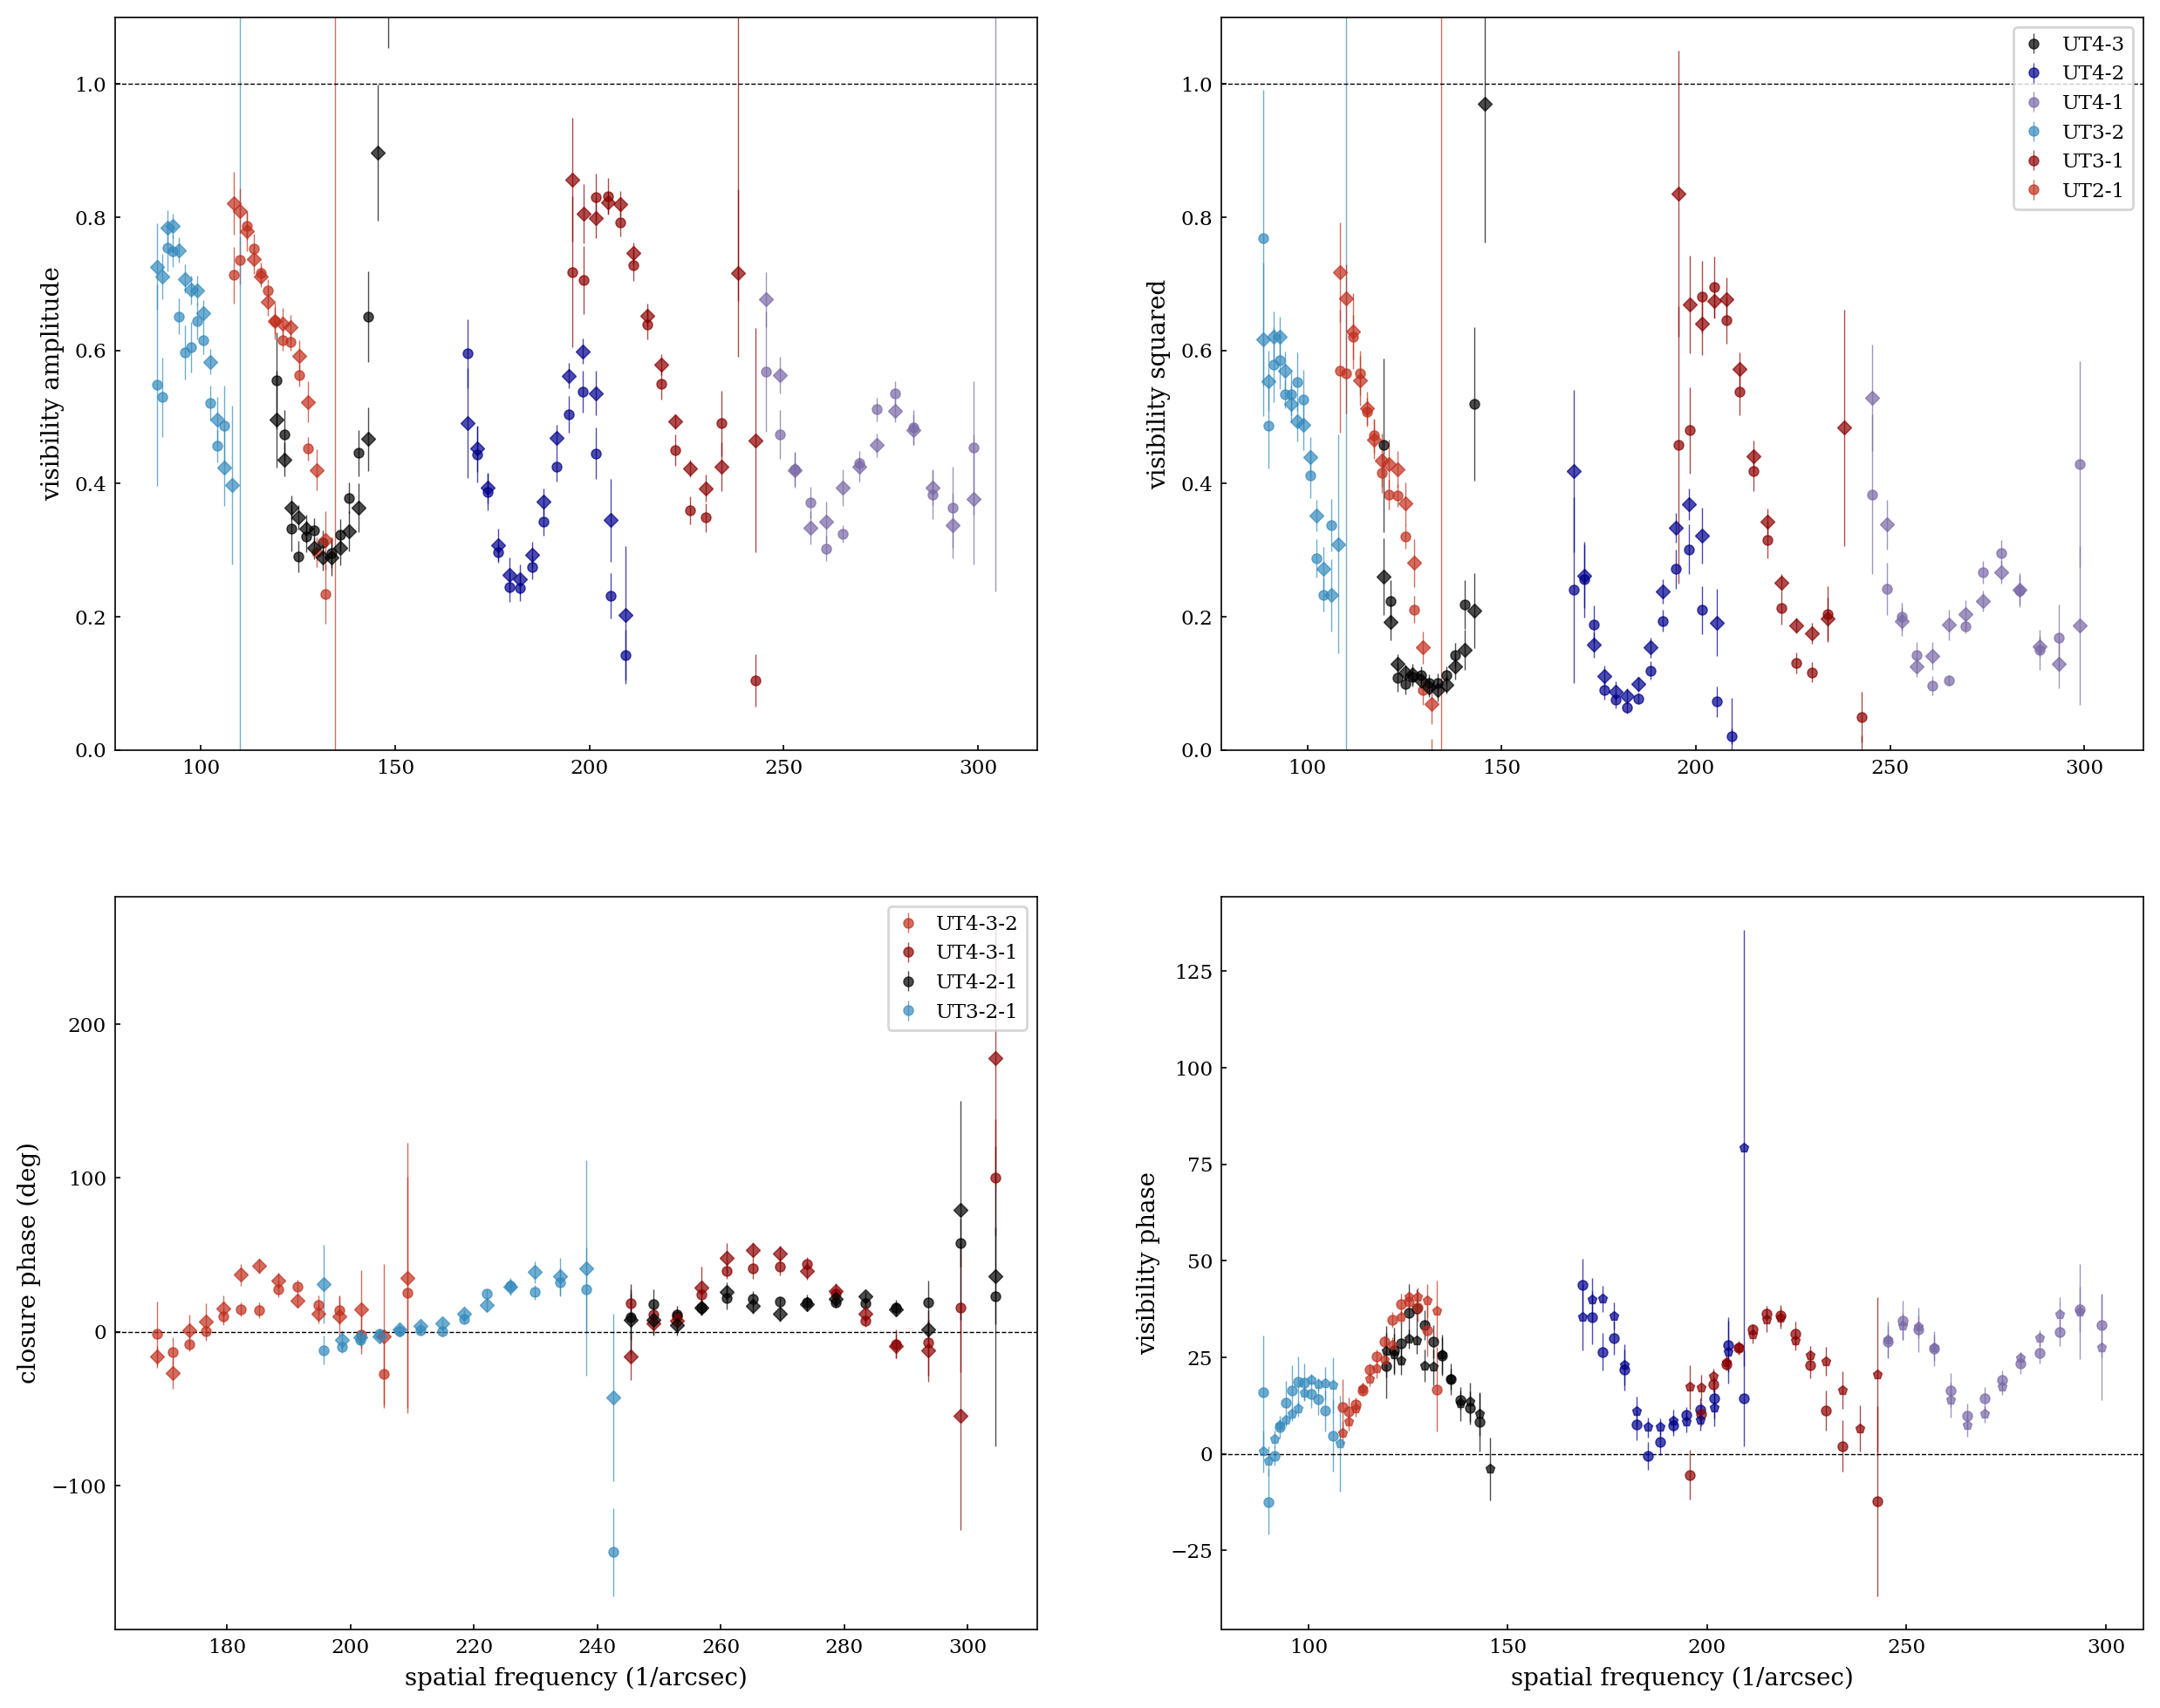

In [16]:
file = sgfiles[0]
d = gravipy.GravData(file)
d.getIntdata(plot=True)

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:46<00:00,  6.53it/s]


---------------------------------------
Mean acceptance fraction: 0.41
---------------------------------------


ndof: 54
red. chi2 for visamp: 8.69
red. chi2 for vis2: 8.04
red. chi2 for visphi: 67.65
red. chi2 for closure: 5.14


-----------------------------------
Best chi2 result:
dRA1 = 24.713
dDEC1 = 4.910
fr2 = -2.880
alpha BH = 2.159
f BG = 0.825
fr BH = 0.122


MCMC Result:
dRA1 = 24.730 + 0.050 - 0.031
dDEC1 = 4.870 + 0.054 - 0.121
fr2 = -2.568 + 0.327 - 0.284
alpha BH = 1.698 + 0.587 - 2.264
f BG = 0.831 + 0.033 - 0.034
fr BH = 0.116 + 0.015 - 0.028
-----------------------------------
Run MCMC for Pol 2


/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:46<00:00,  6.48it/s]
/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.40
---------------------------------------


ndof: 54
red. chi2 for visamp: 11.18
red. chi2 for vis2: 13.24
red. chi2 for visphi: 81.36
red. chi2 for closure: 9.15


-----------------------------------
Best chi2 result:
dRA1 = 24.665
dDEC1 = 4.768
fr2 = -2.951
alpha BH = 2.260
f BG = 0.780
fr BH = 0.140


MCMC Result:
dRA1 = 24.685 + 0.096 - 0.033
dDEC1 = 4.733 + 0.052 - 0.153
fr2 = -2.593 + 0.682 - 0.277
alpha BH = 1.586 + 0.708 - 3.434
f BG = 0.780 + 0.036 - 0.037
fr BH = 0.131 + 0.016 - 0.041
-----------------------------------


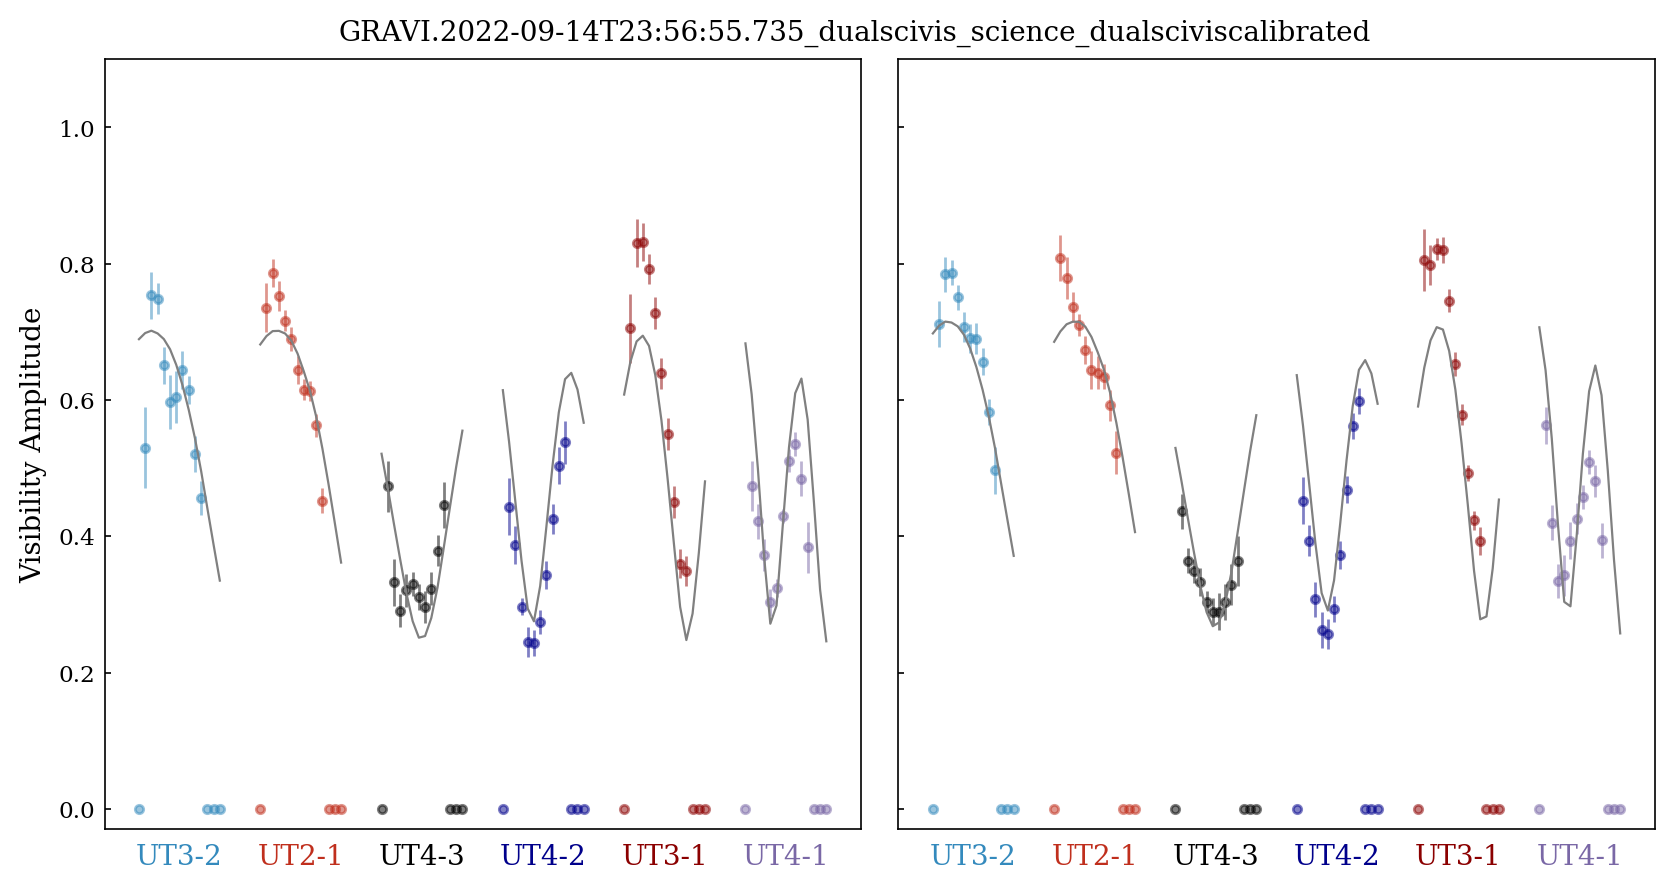

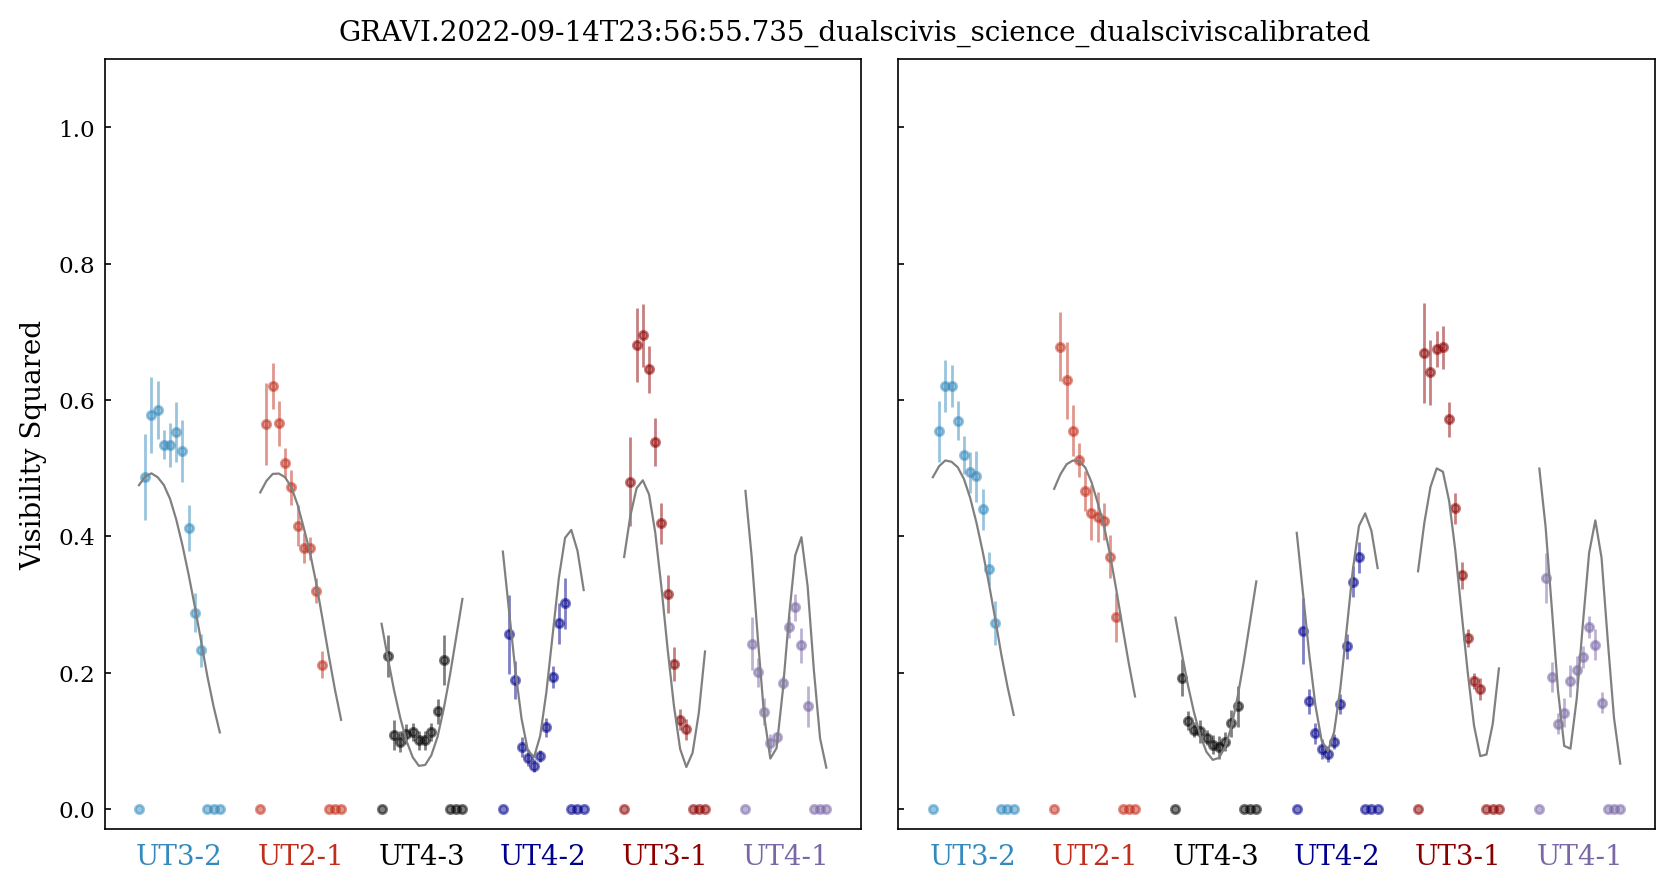

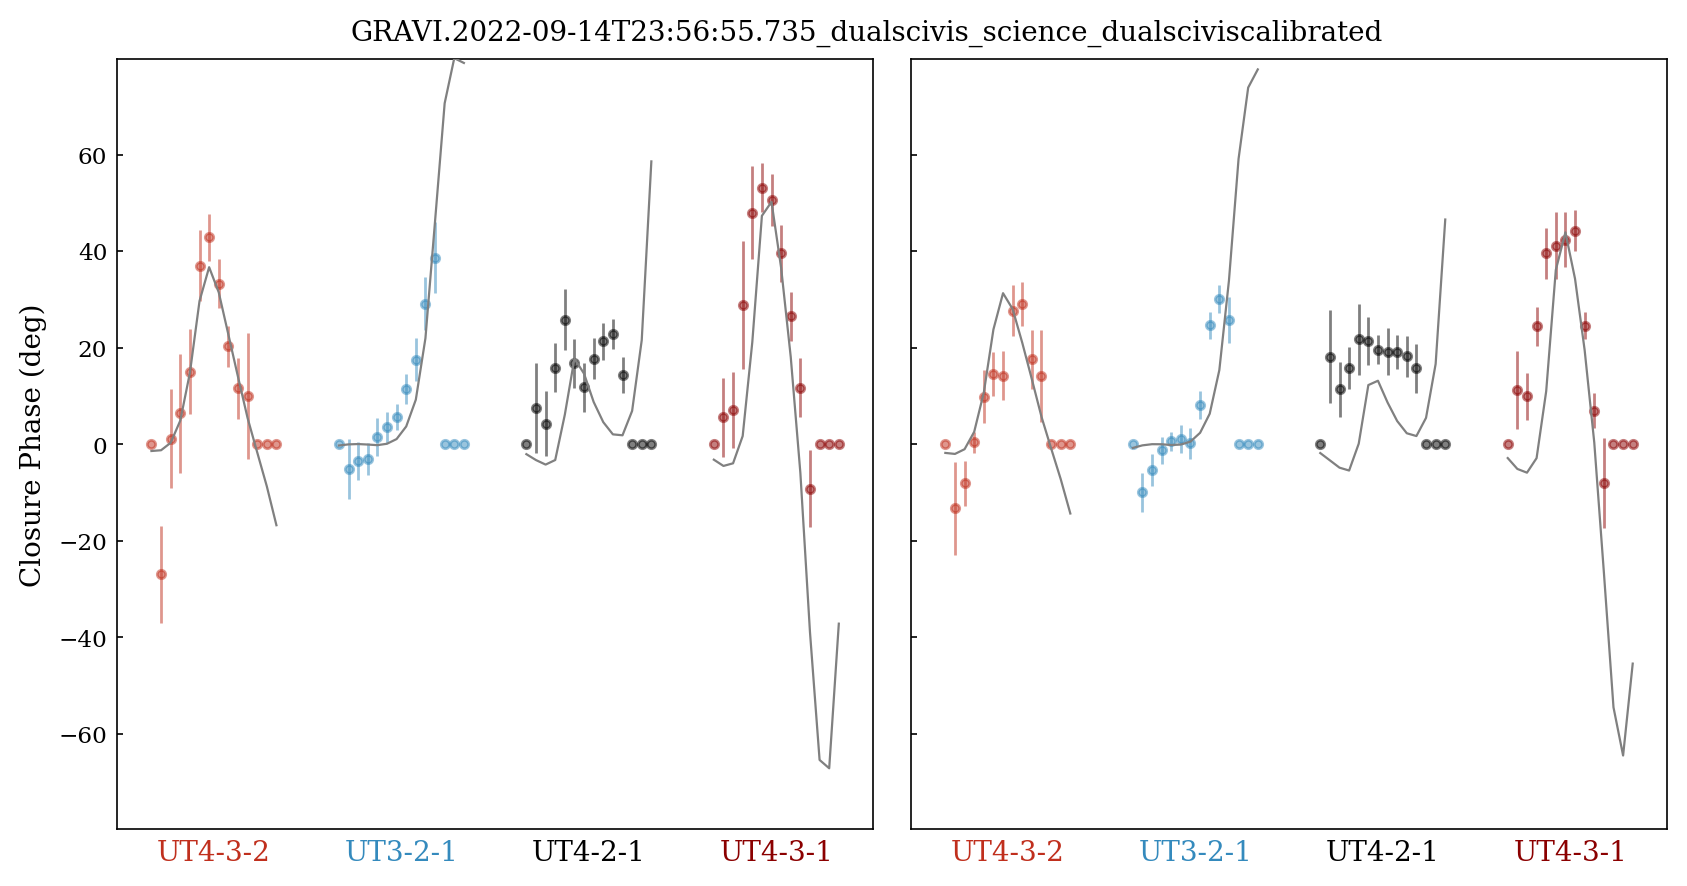

Combined red. chi2 of fitted data: 55.442


[array([24.71300516,  4.91020783, -2.88047782,  2.15934852,  0.8252182 ,
         0.122351  ]),
 array([24.66543525,  4.76769367, -2.95066138,  2.26034386,  0.78026963,
         0.14033781])]

In [17]:
fi = sgfiles[0]
f = gravipy.GravMFit(fi)
f.fitStars(
    # Mandatory arguments
    [s38[0], s62[0]],       # Ra guess, len = nsource, 
    [s38[1], s62[1]],       # Dec guess, len = nsource
    [s62s38],               # flux ratio guess, len = nsource-1
    # optional arguments
    fit_pos=[True, False],  # to not fit star positions
    fit_fr=[True],          # to not fit flux ratios
    fit_for=[0.5, 0.5, 1, 0. ], # what to fit for & weight [VisAmp, Vis2, closure, phases]
    nthreads=20,
    nwalkers=201,
    nruns=301,
    initial=[-4, 1,         # initial guesses: [alpha, fr BG, pc (x2), fr BH, coh. loss]
             0, 0, 
             0.5 , 1],
    plotScience=True,       # show data & fit
    #iopandas='Normalfit'
    )


In [18]:
f.fittab

,column,dRA1,dDEC1,dRA2,dDEC2,fr2,alpha BH,f BG,pc RA,pc Dec,fr BH,CL1,CL2,CL3,CL4,CL5,CL6,chi2
0,in P0_0,26.010993,3.076360,-7.716192,9.479202,-0.674797,-4.000000,1.000000,0.0,0.0,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,8.694688
1,M.L. P0_0,24.713005,4.910208,-7.716192,9.479202,-2.880478,2.159349,0.825218,0.0,0.0,0.122351,1.0,1.0,1.0,1.0,1.0,1.0,8.035052
2,M.P. P0_0,24.730256,4.870460,-7.716192,9.479202,-2.568200,1.697703,0.830999,0.0,0.0,0.116315,1.0,1.0,1.0,1.0,1.0,1.0,5.138341
3,$-\sigma$ P0_0,0.031034,0.121492,0.000000,0.000000,0.284415,2.264376,0.034098,0.0,0.0,0.027777,0.0,0.0,0.0,0.0,0.0,0.0,67.648488
4,$+\sigma$ P0_0,0.049606,0.053622,0.000000,0.000000,0.327446,0.587443,0.032868,0.0,0.0,0.014628,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,in P1_0,26.010993,3.076360,-7.716192,9.479202,-0.674797,-4.000000,1.000000,0.0,0.0,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,11.181233
6,M.L. P1_0,24.665435,4.767694,-7.716192,9.479202,-2.950661,2.260344,0.780270,0.0,0.0,0.140338,1.0,1.0,1.0,1.0,1.0,1.0,13.237493
7,M.P. P1_0,24.684938,4.732690,-7.716192,9.479202,-2.592583,1.585698,0.780227,0.0,0.0,0.130995,1.0,1.0,1.0,1.0,1.0,1.0,9.154714
8,$-\sigma$ P1_0,0.032923,0.153138,0.000000,0.000000,0.277380,3.433964,0.036713,0.0,0.0,0.040606,0.0,0.0,0.0,0.0,0.0,0.0,81.359767
9,$+\sigma$ P1_0,0.096427,0.051677,0.000000,0.000000,0.681783,0.707617,0.035699,0.0,0.0,0.015633,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Fitting - not SgrA*

In [19]:
s42 = orb.pos_orbit('S42', t)*1e3
s29 = orb.pos_orbit('S29', t)*1e3
s42s29 = 10**(-0.4*(orb.star_orbits['S42']['Kmag'] - orb.star_orbits['S29']['Kmag']))

In [20]:
sep = s42-s29
pc = s29 - n_off

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:36<00:00,  8.28it/s]


---------------------------------------
Mean acceptance fraction: 0.44
---------------------------------------


ndof: 53
red. chi2 for visamp: 3.89
red. chi2 for vis2: 3.89
red. chi2 for visphi: 3.74
red. chi2 for closure: 3.18


-----------------------------------
Best chi2 result:
dRA1 = -1.715
dDEC1 = -36.926
alpha BH = -0.891
f BG = 0.871
pc RA = 18.342
pc Dec = 34.071
fr BH = -0.467


MCMC Result:
dRA1 = -1.701 + 0.022 - 0.022
dDEC1 = -36.930 + 0.046 - 0.048
alpha BH = -0.286 + 1.684 - 0.665
f BG = 0.873 + 0.031 - 0.020
pc RA = 18.332 + 0.021 - 0.020
pc Dec = 34.078 + 0.045 - 0.044
fr BH = -0.459 + 0.015 - 0.013
-----------------------------------
Run MCMC for Pol 2


/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:36<00:00,  8.30it/s]
/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.43
---------------------------------------


ndof: 53
red. chi2 for visamp: 4.28
red. chi2 for vis2: 3.20
red. chi2 for visphi: 6.48
red. chi2 for closure: 3.36


-----------------------------------
Best chi2 result:
dRA1 = -1.574
dDEC1 = -36.941
alpha BH = -2.675
f BG = 0.687
pc RA = 18.336
pc Dec = 33.960
fr BH = -0.469


MCMC Result:
dRA1 = -1.612 + 0.034 - 0.039
dDEC1 = -36.813 + 0.130 - 0.090
alpha BH = -2.517 + 1.912 - 0.604
f BG = 0.715 + 0.039 - 0.023
pc RA = 18.364 + 0.038 - 0.027
pc Dec = 33.857 + 0.075 - 0.089
fr BH = -0.462 + 0.023 - 0.014
-----------------------------------


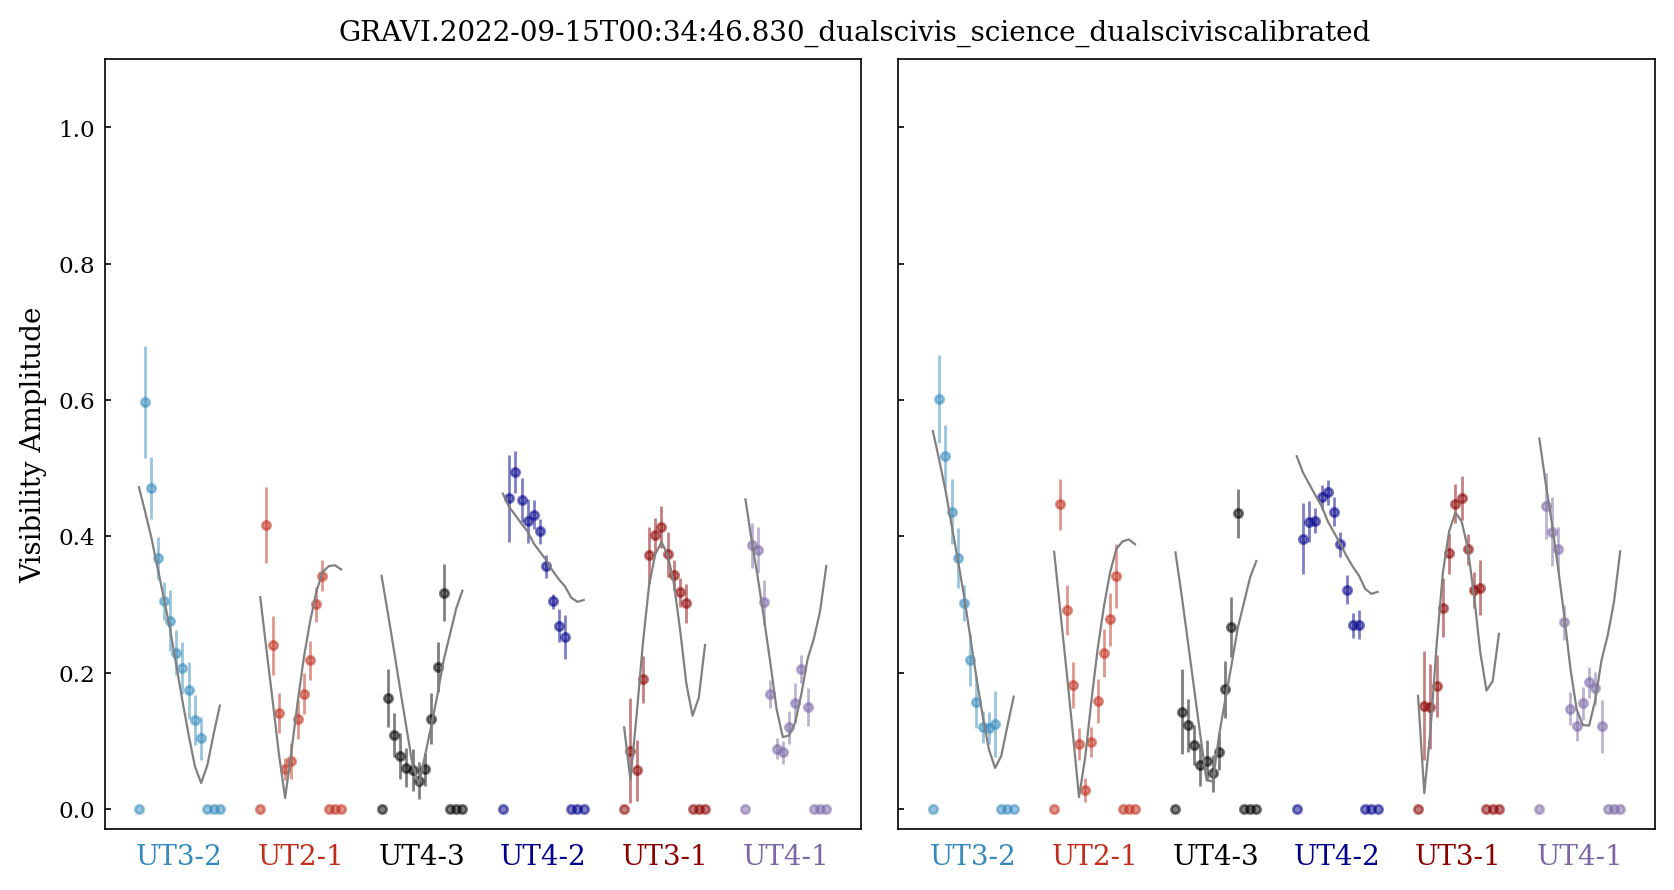

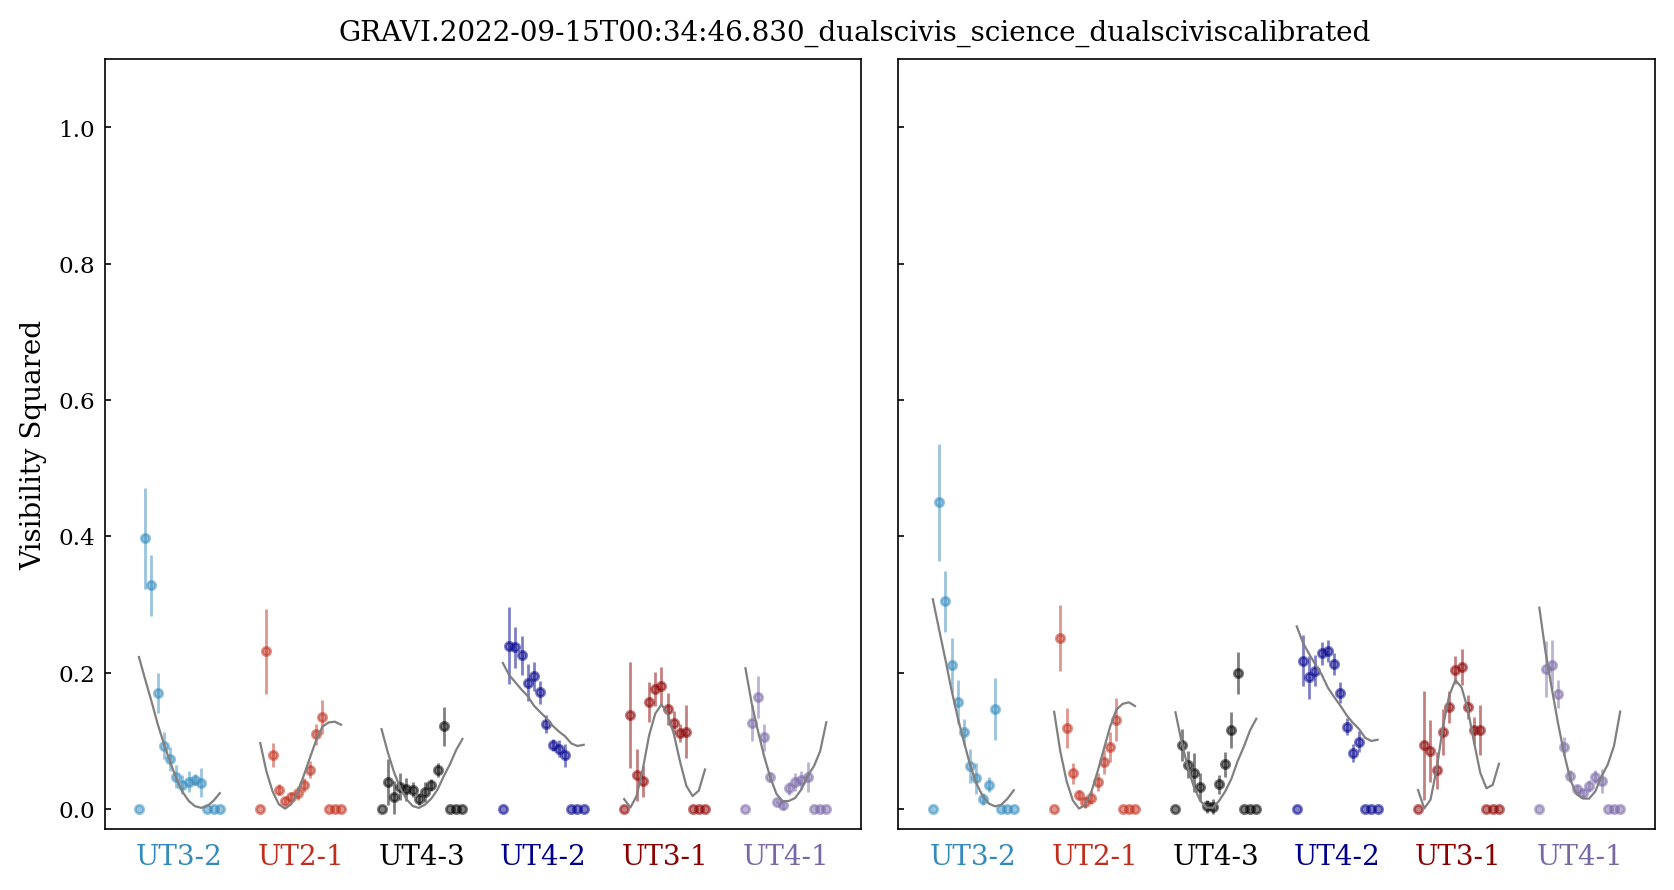

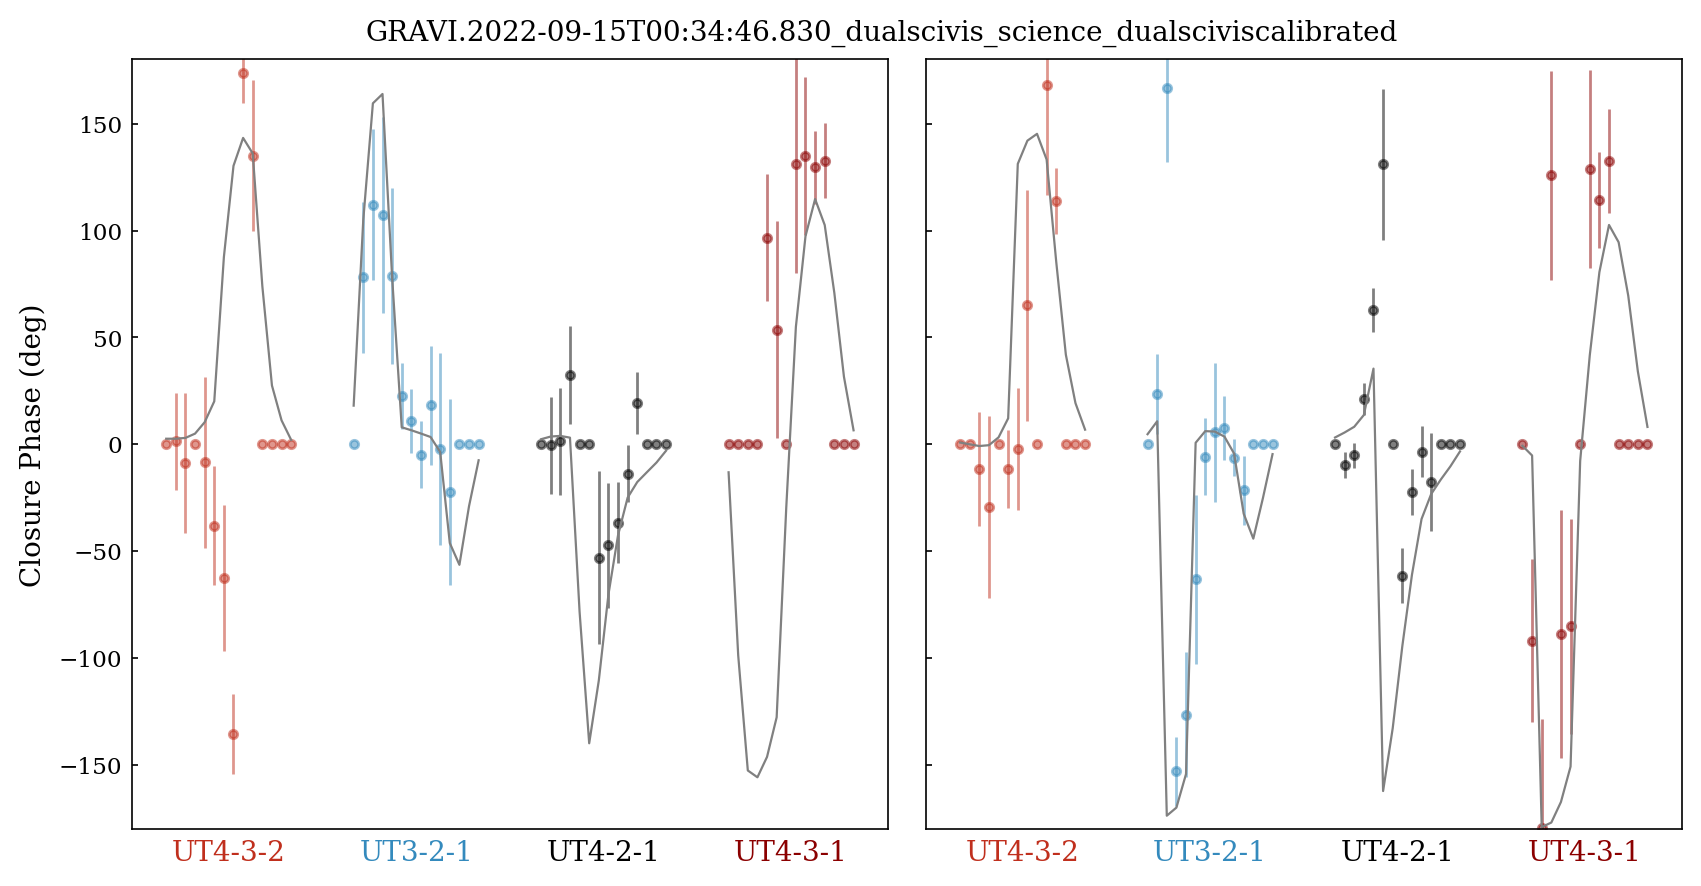

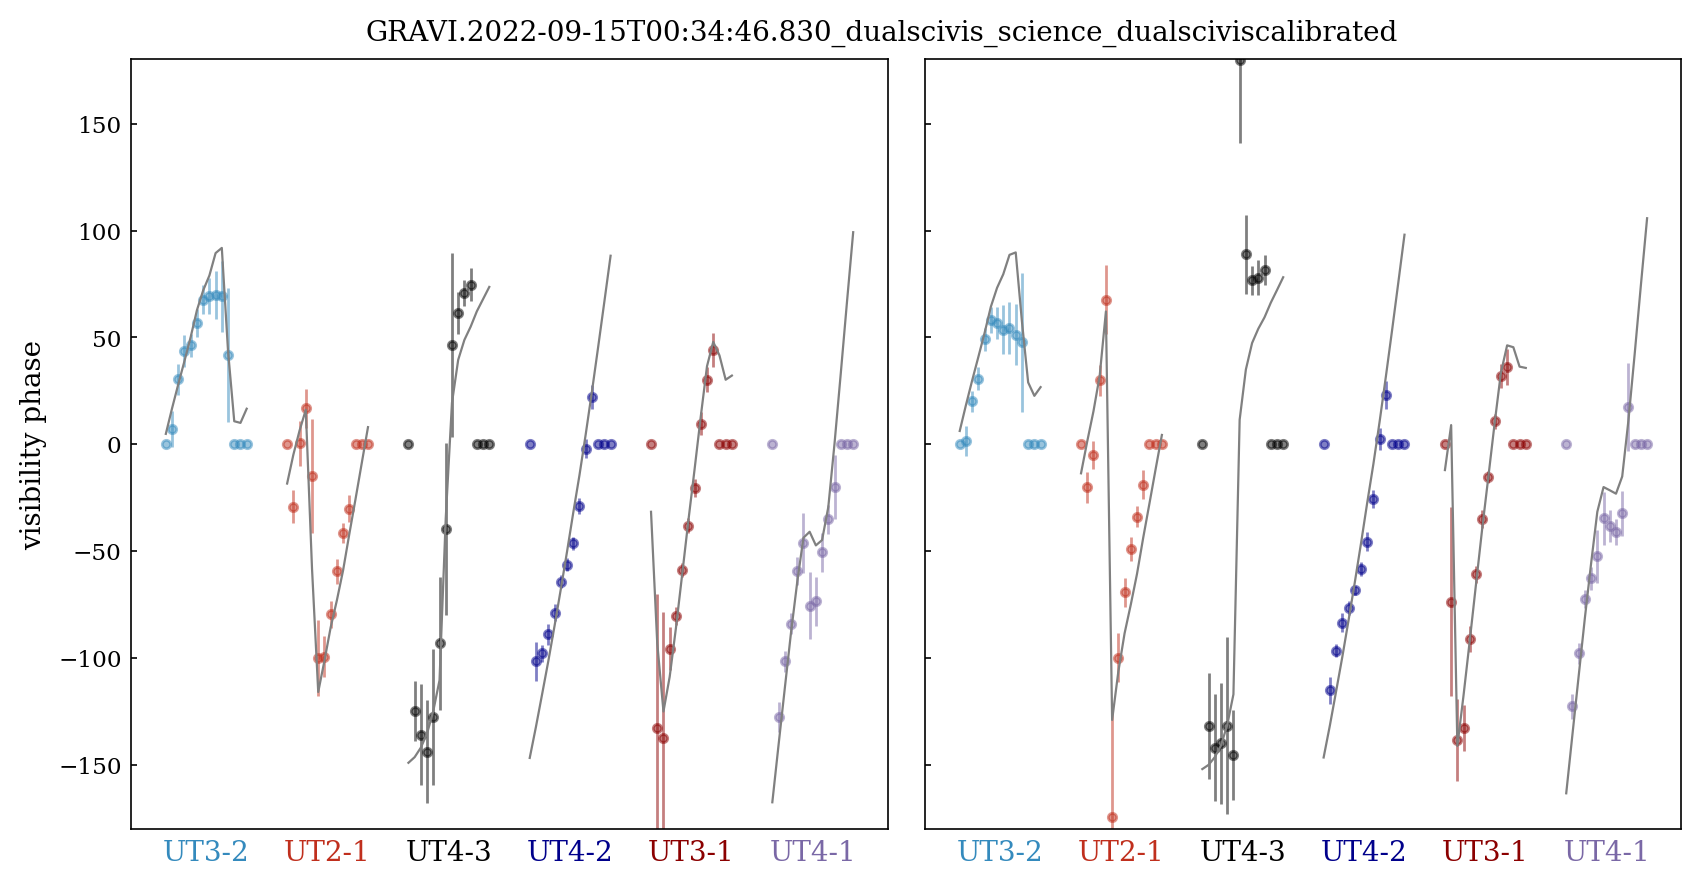

Combined red. chi2 of fitted data: 32.014


[array([ -1.71461432, -36.92583548,  -0.89086453,   0.87104589,
         18.34163774,  34.07137513,  -0.46725832]),
 array([ -1.57377249, -36.94122966,  -2.67539641,   0.68728258,
         18.335801  ,  33.95999438,  -0.46861054])]

In [21]:
fi = northfiles[0]
f = gravipy.GravMFit(fi)
f.fitStars([sep[0]],
           [sep[1]],
           [],
           nthreads=20,
           nwalkers=201,
           nruns=301,
           fit_for=[1, 1, 1, 1. ],
           initial=[3, 3, *pc, s42s29, 1],
           plotScience=True)

NDIT = 1
using channels from #3 to #13
Pol 1


ndof: 53
red. chi2 for visamp: 36.96
red. chi2 for vis2: 17.39
red. chi2 for visphi: 99.71
red. chi2 for closure: 12.85


Pol 2


ndof: 53
red. chi2 for visamp: 43.65
red. chi2 for vis2: 24.26
red. chi2 for visphi: 133.72
red. chi2 for closure: 12.39




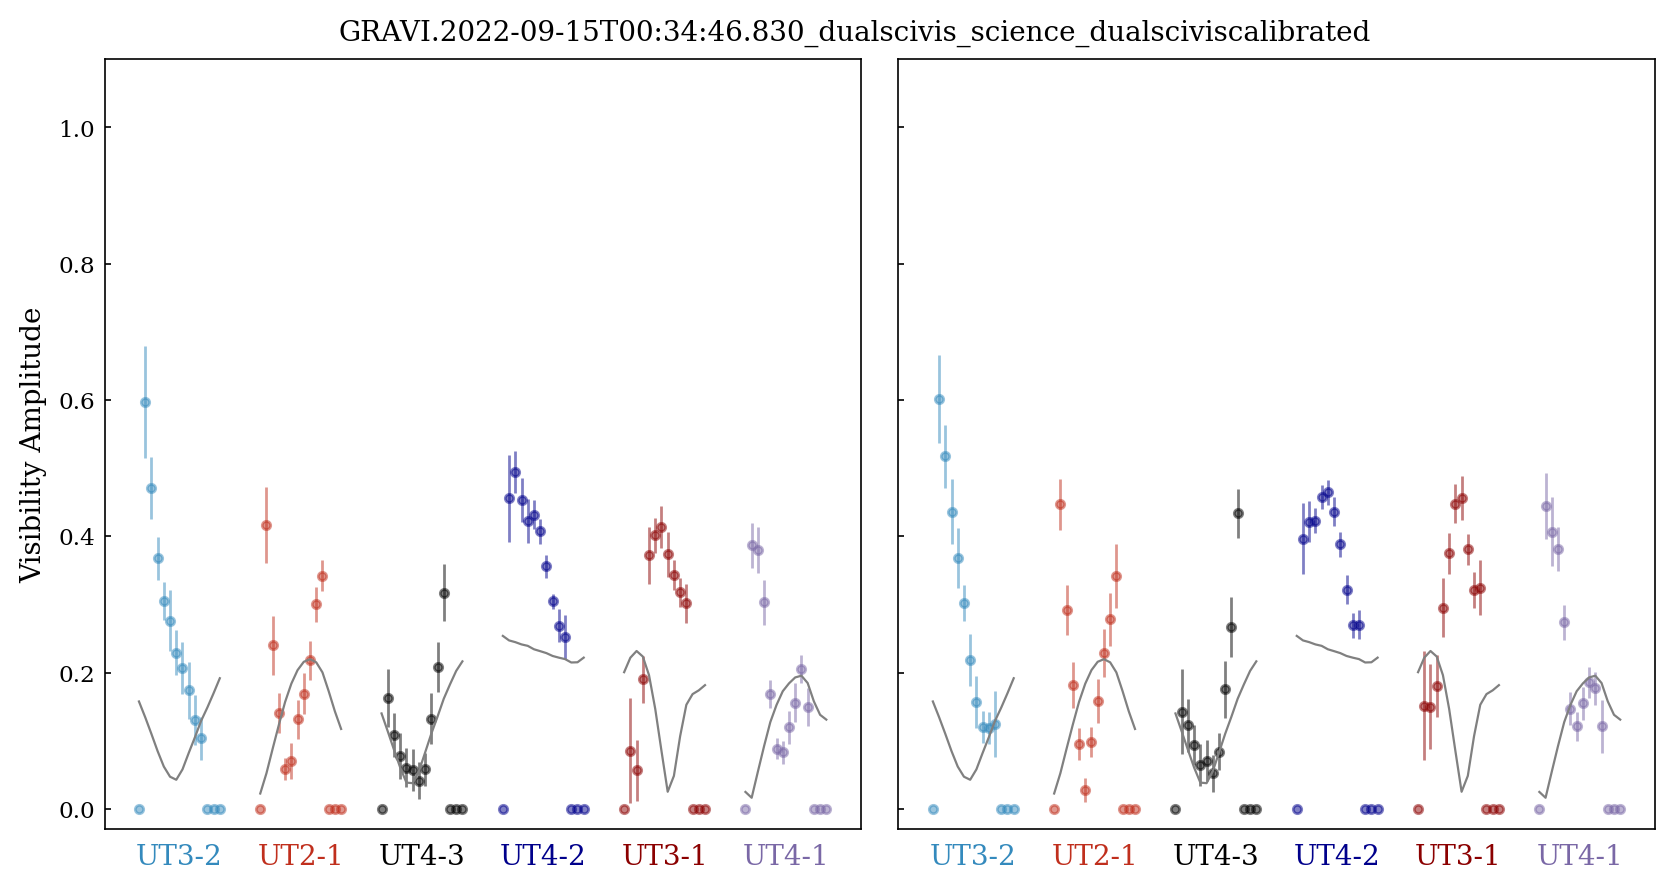

<Figure size 1400x900 with 0 Axes>

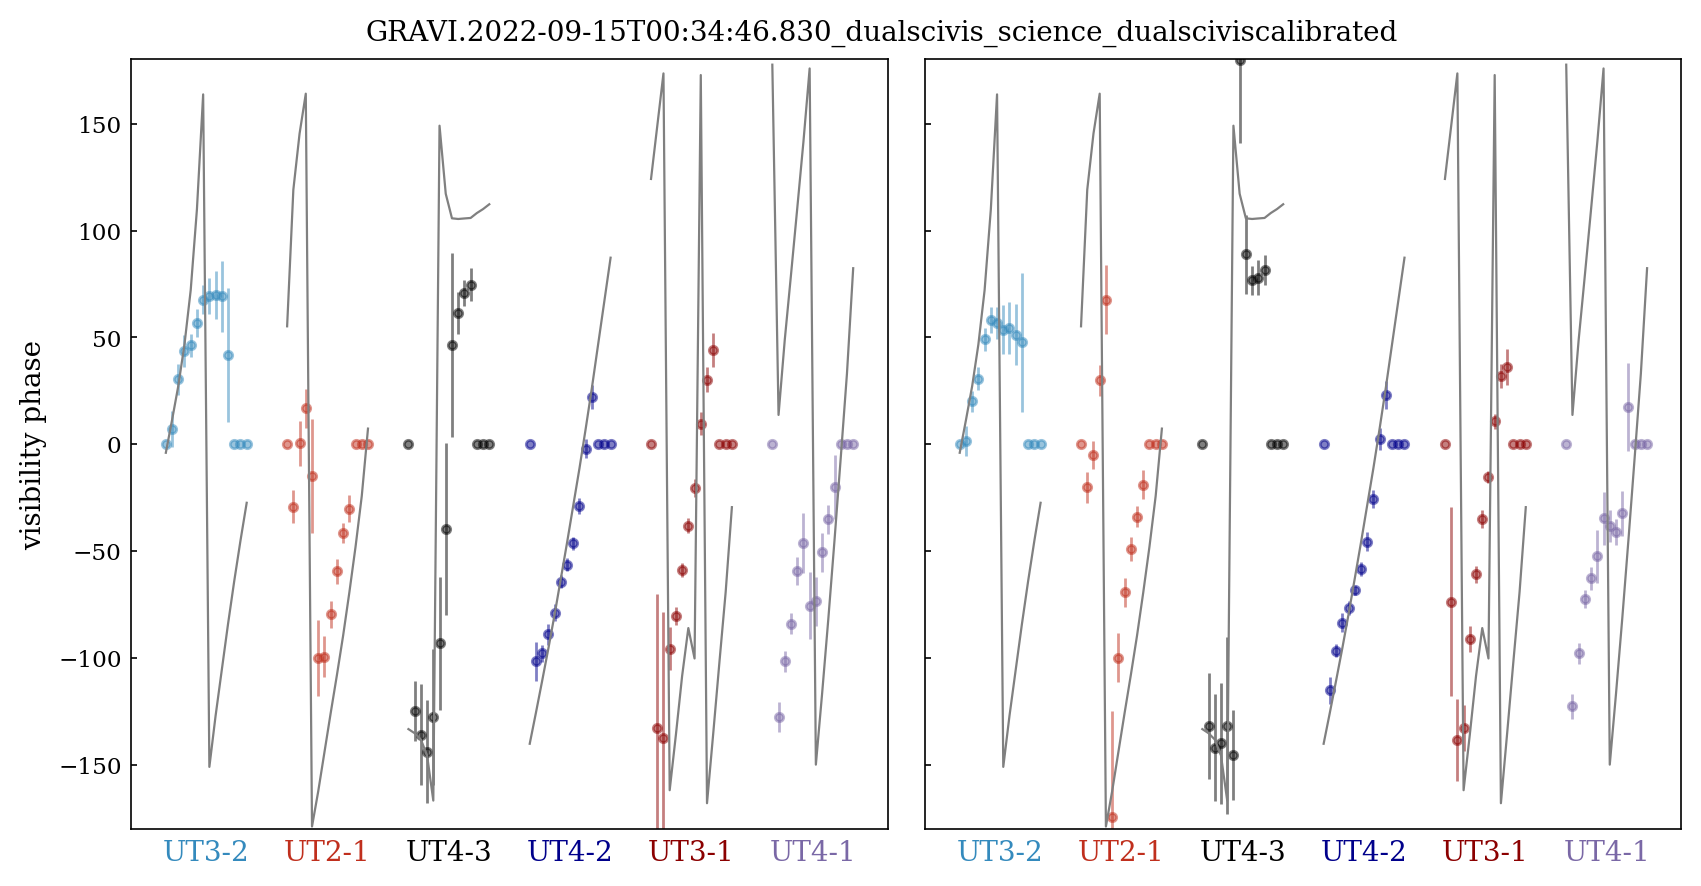

Combined red. chi2 of fitted data: 314.046


[]

In [34]:
f = gravipy.GravMFit(fi)
f.fitStars([sep[0]],
           [sep[1]],
           [],
           nthreads=20,
           nwalkers=201,
           nruns=301,
           fit_for=[1, 0, 0, 1. ],
           initial=[3, 3, 
                    *pc, 
                    s42s29, 1],
           plotScience=True,
           no_fit=True)

In [33]:
pwd

'/home/fwidmann/JupyterNotebooks'